In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
# Load the dataset
df = pd.read_csv('/kaggle/input/covid-data/owid-covid-data.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [18]:
# Filter for a few countries and latest data
countries = ['India', 'United States', 'Brazil', 'Russia', 'Germany']
latest_df = df[df['location'].isin(countries)]
latest_df = latest_df[latest_df['date'] == latest_df['date'].max()]
# Select important columns
latest_df = latest_df[['location', 'total_cases', 'total_deaths', 'total_vaccinations']]


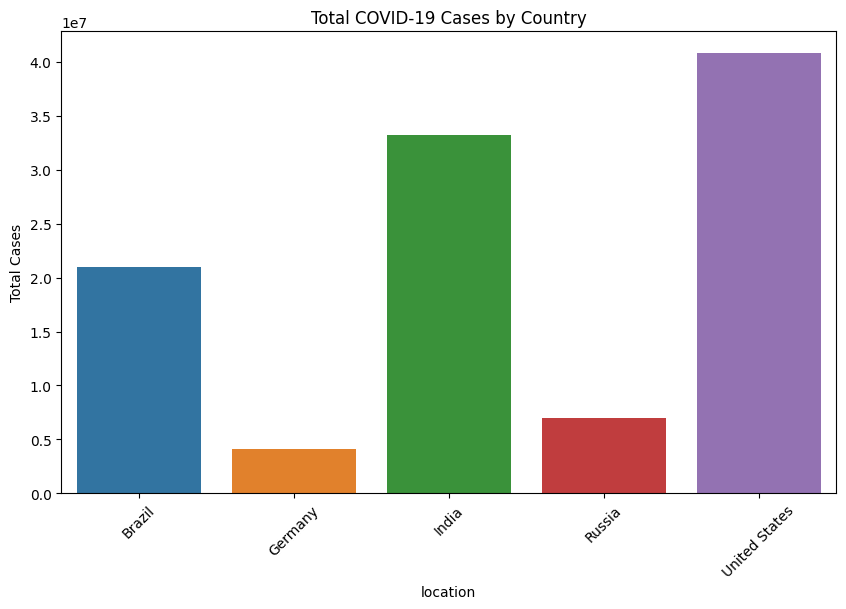

In [19]:
# Bar plot: Total Cases by Country
plt.figure(figsize=(10,6))
sns.barplot(x='location', y='total_cases', data=latest_df)
plt.title('Total COVID-19 Cases by Country')
plt.xticks(rotation=45)
plt.ylabel('Total Cases')
plt.show()

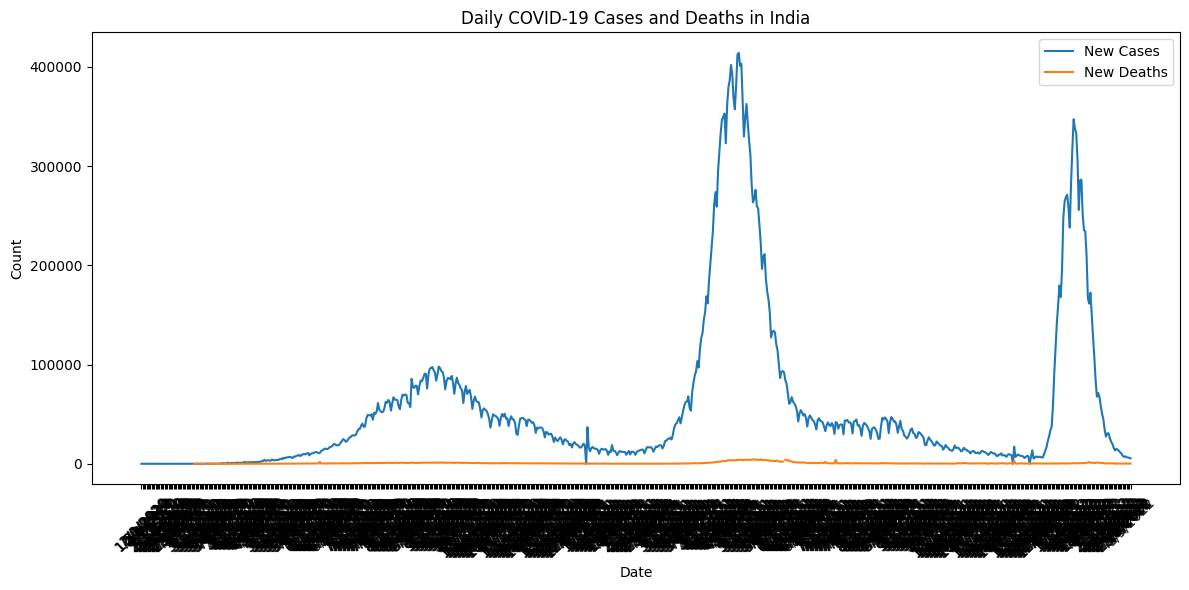

In [20]:
# Time-Series Analysis for India
india_df = df[df['location'] == 'India']

plt.figure(figsize=(12,6))
plt.plot(india_df['date'], india_df['new_cases'], label='New Cases')
plt.plot(india_df['date'], india_df['new_deaths'], label='New Deaths')
plt.title('Daily COVID-19 Cases and Deaths in India')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Plotly interactive chart: Vaccinations
fig = px.line(
    df[df['location'].isin(countries)],
    x='date', y='total_vaccinations',
    color='location',
    title='Vaccination Progress Over Time'
)
fig.show()